In [400]:
#!pip install numpy

In [401]:
#!pip install pandas

In [402]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [403]:
from sklearn.datasets import fetch_california_housing

In [404]:
data = pd.read_excel("https://github.com/Hlopez490/ML01/blob/main/Real%20estate%20valuation%20data%20set.xlsx?raw=true")

In [405]:
# remove unecessary columns (Last 2 columns were null, and date and time are irrelivant to our calculations)
data = data.dropna()

In [406]:
X = data[["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores"]].copy()
X.columns = ['X2', 'X3', 'X4']
y = data[["Y house price of unit area"]].copy()
y.columns = ['Y']

In [407]:
X=(X-X.min())/(X.max()-X.min())
X["intercept"] = 1
X = X[["intercept",'X2', 'X3', 'X4']]

In [408]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [409]:
model = SGDRegressor(alpha=0.005, eta0=0.0001, max_iter = 1000000, tol = 0.0000001) 
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.005, eta0=0.0001, max_iter=1000000, tol=1e-07)

In [410]:
y_predict_train = model.predict(x_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_predict_train)))
r2_train = r2_score(y_train, y_predict_train) 

In [411]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 8.48551208993776
R2 score is 0.5254761090564053




In [412]:
# model evaluation for testing set
y_test_predict = model.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

In [419]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 9.80267872654445
R2 score is 0.5159726713862811


In [428]:
x_test = x_test.sort_values(by = 'X2',ascending=True)
X_plot = x_test['X2'].values.reshape(-1,1)

array([23.3902489])

In [423]:
y_pred = (model.coef_[1]*X_plot) + model.intercept_

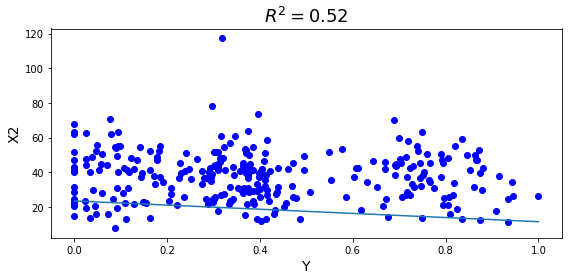

In [430]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_plot, y_pred)
ax.scatter(X_plot,y_test , c='blue')
ax.set_ylabel('X2', fontsize=14)
ax.set_xlabel('Y', fontsize=14)
ax.set_title('$R^2= %.2f$' % r2_test, fontsize=18)

fig.tight_layout()